# Sales Forecasting System

# Dataset

## Description

## Source

## Why are we using it?

In [1]:
import pandas as pd
import numpy as np

In [26]:
dataframe = pd.read_csv("archive/car_prices.csv")

display(dataframe.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# EDA

In [4]:
dataframe.shape

(558837, 16)

In [ ]:
dataframe["year"].unique() # vehicle years

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

In [11]:
dataframe.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [12]:
dataframe.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [14]:
print(dataframe.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [ ]:
# Impute/drop missing? Decision to take

In [29]:
#dataframe["saledate"] = pd.to_datetime(dataframe["saledate"])
#dataframe.iloc[2896, :]
#DATE_FORMAT = '%a %b %d %Y %H:%M:%S GMT%z (%Z)' # this raises an error as well

# RUN THIS FIRST (UNCOMMENT BELOW)

#dataframe["saledate"] = dataframe["saledate"].str.replace(r' \((.*?)\)', '', regex=True)
#dataframe
DATE_FORMAT = '%a %b %d %Y %H:%M:%S GMT%z'
dataframe["saledate"] = pd.to_datetime(
    dataframe["saledate"],
    format=DATE_FORMAT,
    errors='coerce'
)

print(dataframe["saledate"].head())
dataframe.dtypes


0   2014-12-16 12:30:00-08:00
1   2014-12-16 12:30:00-08:00
2   2015-01-15 04:30:00-08:00
3   2015-01-29 04:30:00-08:00
4   2014-12-18 12:30:00-08:00
Name: saledate, dtype: datetime64[ns, UTC-08:00]


year                                int64
make                               object
model                              object
trim                               object
body                               object
transmission                       object
vin                                object
state                              object
condition                         float64
odometer                          float64
color                              object
interior                           object
seller                             object
mmr                               float64
sellingprice                      float64
saledate        datetime64[ns, UTC-08:00]
dtype: object

In [30]:
dataframe['sale_year'] = dataframe['saledate'].dt.year
dataframe['sale_month'] = dataframe['saledate'].dt.month
dataframe['sale_week'] = dataframe['saledate'].dt.isocalendar().week
dataframe['sale_day'] = dataframe['saledate'].dt.day
dataframe['sale_dayofweek'] = dataframe['saledate'].dt.dayofweek  # Monday=0
dataframe['sale_quarter'] = dataframe['saledate'].dt.quarter

dataframe.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,seller,mmr,sellingprice,saledate,sale_year,sale_month,sale_week,sale_day,sale_dayofweek,sale_quarter
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00-08:00,2014.0,12.0,51,16.0,1.0,4.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00-08:00,2014.0,12.0,51,16.0,1.0,4.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,...,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00-08:00,2015.0,1.0,3,15.0,3.0,1.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,...,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00-08:00,2015.0,1.0,5,29.0,3.0,1.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,...,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00-08:00,2014.0,12.0,51,18.0,3.0,4.0


In [34]:
dataframe['saledate'].min(), dataframe['saledate'].max()


(Timestamp('2014-01-01 09:15:00-0800', tz='UTC-08:00'),
 Timestamp('2015-03-06 07:00:00-0800', tz='UTC-08:00'))

<Axes: xlabel='saledate'>

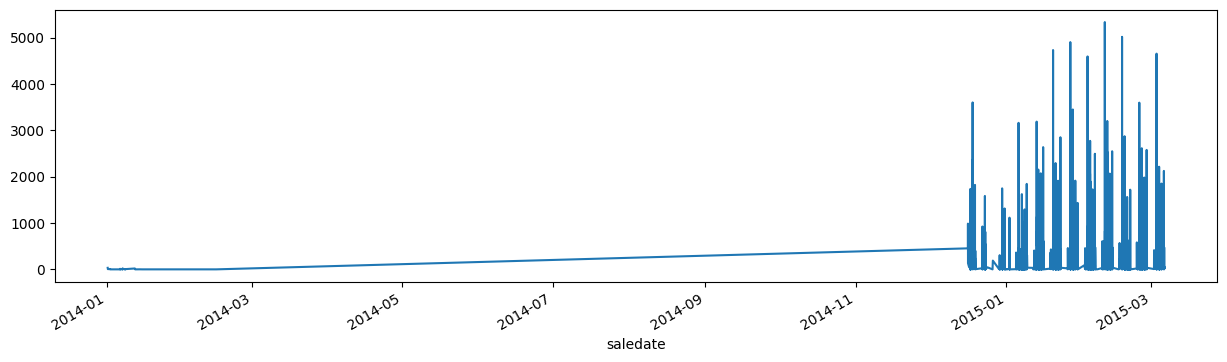

In [32]:
import matplotlib

dataframe['saledate'].value_counts().sort_index().plot(figsize=(15,4))


In [35]:
full_range = pd.date_range(dataframe['saledate'].min(), dataframe['saledate'].max(), freq='D')
missing_days = full_range.difference(dataframe['saledate'].dt.date.unique())
print("Missing days:", len(missing_days))

Missing days: 429


# Future Goals

## Forecasting
### Multi-level Forecasting

- Sales per state
- Sales per make

### External Regressors

- Fuel Price Index
- Interest Rates Data

## Dashboard

### Interactive Time-Series Dashboard
- Using Streamlit

- Forecasted VS Actual Sales
- Region-wise heatmap of sales
- Make-wise bar charts
- Manufacturer -> View Model Sales -> View Prediction

### Future Price Dynamics

- **Predict**: future price trends for each make/model
e.g., "Used Toyota Corolla prices are expected to rise 3% in next 6 months."

### Condition-Based Forecasting

- **Forecast** sales by condition

## Extra

### State-level market classification

- Cluster states by: average selling price, average odometer, most popular makes.

Organize into:

- Budget markets
- Luxury markets
- High-volume states